In [5]:
!pip install yfinance

In [11]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the stock list
stocks = ['INFY.NS', 'RELIANCE.NS', 'HDFCBANK.NS', 'TCS.NS']

# Download close prices (auto-adjusted)
data = yf.download(stocks, start='2020-01-01', end='2024-12-31', auto_adjust=True)['Close']

# Forward-fill any missing values
data = data.ffill()

# Check first few rows
print(data.head())


[*********************100%***********************]  4 of 4 completed

Ticker      HDFCBANK.NS     INFY.NS  RELIANCE.NS       TCS.NS
Date                                                         
2020-01-01   605.529419  633.151062   675.324219  1900.037964
2020-01-02   609.389160  631.303711   686.821228  1891.315918
2020-01-03   600.698853  641.013428   687.648804  1929.008179
2020-01-06   587.698730  634.869629   671.700684  1928.832764
2020-01-07   597.004761  625.460632   682.034546  1933.566284


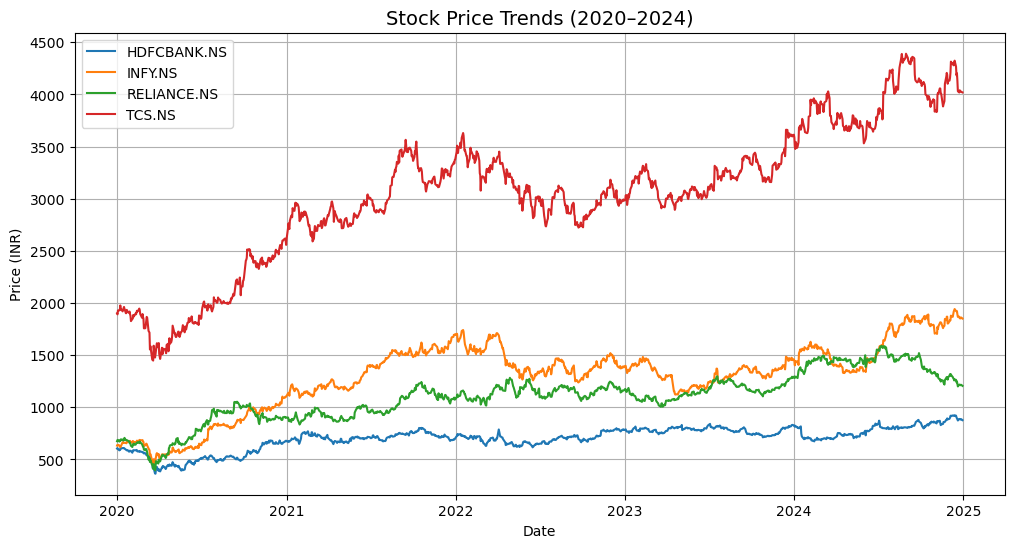

In [21]:
# Create a figure and set the size of the plot
plt.figure(figsize=(12,6))

# Loop through each stock column and plot its price
for stock in data.columns:
    plt.plot(data.index, data[stock], label=stock)  # plot each stock's price

# Add title and labels to make the chart clear
plt.title("Stock Price Trends (2020–2024)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Price (INR)")

# Add a legend to identify each line
plt.legend()

# Enable gridlines for better readability
plt.grid(True)

# Display the plot
plt.show()

In [17]:
# Calculate the percentage change in stock prices day by day
returns = data.pct_change().dropna()

# Show the first few rows of the daily returns data
returns.head()

Ticker,HDFCBANK.NS,INFY.NS,RELIANCE.NS,TCS.NS
Date,,,,
2020-01-02,0.006374,-0.002918,0.017024,-0.004590
2020-01-03,-0.014261,0.015380,0.001205,0.019929
2020-01-06,-0.021642,-0.009585,-0.023192,-0.000091
2020-01-07,0.015835,-0.014820,0.015385,0.002454
2020-01-08,-0.002618,-0.013326,-0.007510,0.022395


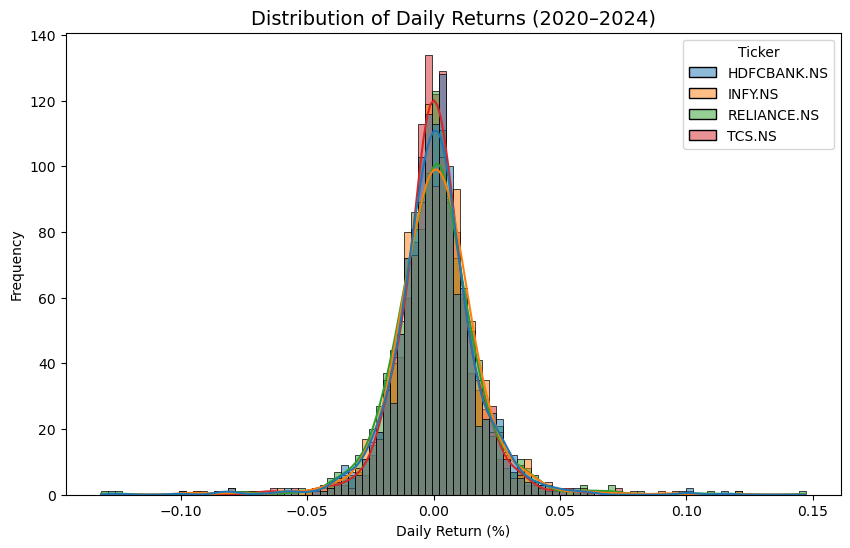

In [18]:
# Plot histogram to visualize the spread of daily returns
plt.figure(figsize=(10,6))

# seaborn's histplot helps visualize the frequency of returns
sns.histplot(returns, bins=100, kde=True)

# Add a title and labels
plt.title("Distribution of Daily Returns (2020–2024)", fontsize=14)
plt.xlabel("Daily Return (%)")
plt.ylabel("Frequency")

plt.show()

In [19]:
# Calculate the mean of daily returns and annualize it (approx. 252 trading days per year)
mean_returns = returns.mean() * 252

# Calculate standard deviation (volatility) and annualize it
volatility = returns.std() * (252 ** 0.5)

# Combine both metrics into one DataFrame
comparison = pd.DataFrame({
    'Annual Return (%)': mean_returns * 100,   # Convert to percentage
    'Volatility (%)': volatility * 100         # Convert to percentage
})

# Display the summary table
print("=== Risk vs Return Summary (2020–2024) ===")
print(comparison)

=== Risk vs Return Summary (2020–2024) ===
             Annual Return (%)  Volatility (%)
Ticker                                        
HDFCBANK.NS          11.285311       27.274628
INFY.NS              25.760599       27.859056
RELIANCE.NS          16.231103       29.742344
TCS.NS               18.269440       24.468714


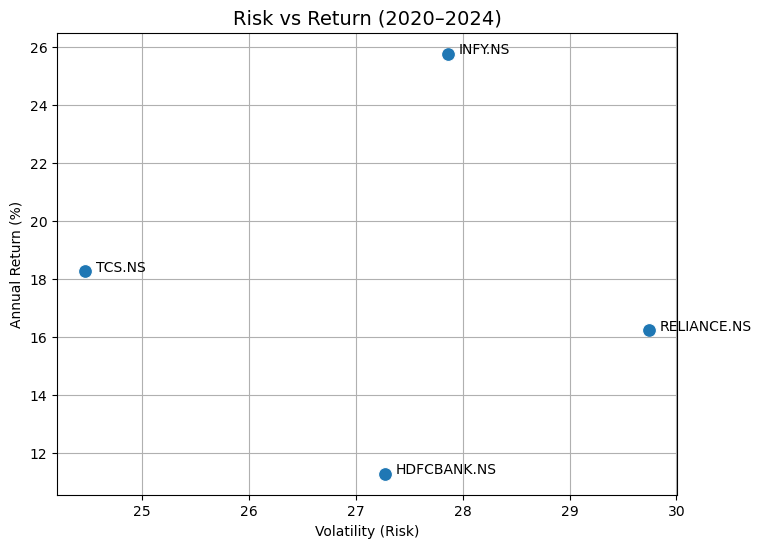

In [20]:
# Create a scatter plot comparing risk and return
plt.figure(figsize=(8,6))
sns.scatterplot(x='Volatility (%)', y='Annual Return (%)', data=comparison, s=100)

# Annotate each point with the stock name
for i in comparison.index:
    plt.text(
        x=comparison.loc[i, 'Volatility (%)']+0.1,
        y=comparison.loc[i, 'Annual Return (%)'],
        s=i, fontsize=10
    )

# Add title and axis labels
plt.title("Risk vs Return (2020–2024)", fontsize=14)
plt.xlabel("Volatility (Risk)")
plt.ylabel("Annual Return (%)")
plt.grid(True)

# Show the scatter plot
plt.show()